## Objective: Classifying the IRIS flowers using the decision trees c 5.0

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  #datasets in sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier #DT
from sklearn import tree #DT
from sklearn.metrics import classification_report
from sklearn import preprocessing #normalizing 

In [2]:
import os
os.chdir("/home/prathikm/Desktop/ds_assignments/in_class_notebook_and_csvs")

In [3]:
# import the data
iris = pd.read_csv('iris.csv')

In [4]:
iris.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Convert categorical class to numerical data using label encoder
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['iris']) 

In [6]:
iris.head()

,sepal length,sepal width,petal length,petal width,iris,Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [7]:
iris['Species'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [9]:
x

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [11]:
iris['Species'].unique()

array([0, 1, 2])

In [12]:
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [13]:
colnames = list(iris.columns)
colnames

['sepal length',
 'sepal width',
 'petal length',
 'petal width',
 'iris',
 'Species']

In [15]:
# Splitting data into training and testing data set, test = 20%, 
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

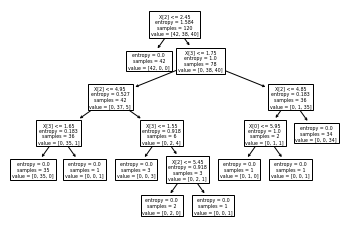

In [18]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5) #we control the depth - only 3 levels are allowed
model.fit(x_train,y_train)
#PLot the decision tree
tree.plot_tree(model);

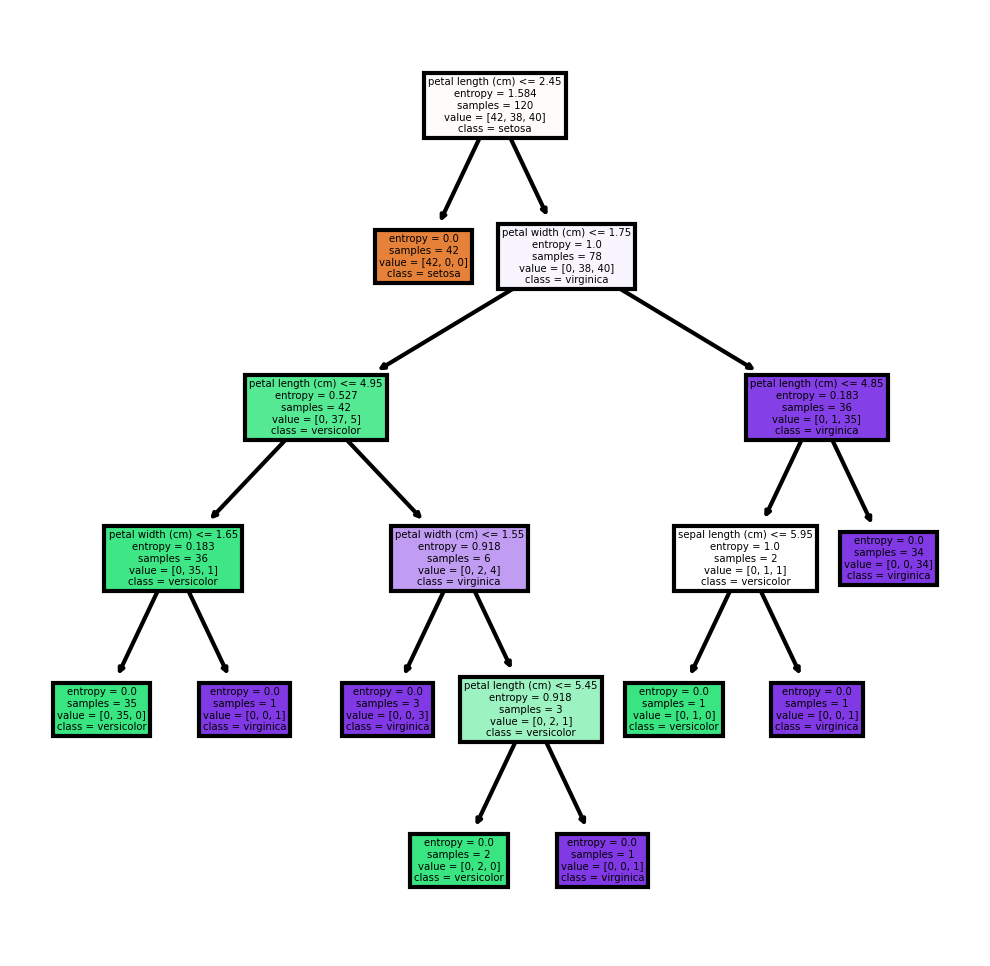

In [19]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [20]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    12
2    10
0     8
dtype: int64

In [21]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [22]:
y_test

38     0
66     1
115    2
117    2
89     1
136    2
68     1
94     1
84     1
28     0
90     1
11     0
40     0
126    2
79     1
144    2
123    2
124    2
76     1
59     1
132    2
105    2
53     1
17     0
64     1
18     0
13     0
116    2
9      0
81     1
Name: Species, dtype: int64

In [23]:
x_test

,sepal length,sepal width,petal length,petal width
38,4.4,3.0,1.3,0.2
66,5.6,3.0,4.5,1.5
115,6.4,3.2,5.3,2.3
117,7.7,3.8,6.7,2.2
89,5.5,2.5,4.0,1.3
136,6.3,3.4,5.6,2.4
68,6.2,2.2,4.5,1.5
94,5.6,2.7,4.2,1.3
84,5.4,3.0,4.5,1.5
28,5.2,3.4,1.4,0.2


In [24]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,0,10


In [25]:
# Accuracy 
np.mean(preds==y_test)

1.0

In [26]:
preds==y_test

38     True
66     True
115    True
117    True
89     True
136    True
68     True
94     True
84     True
28     True
90     True
11     True
40     True
126    True
79     True
144    True
123    True
124    True
76     True
59     True
132    True
105    True
53     True
17     True
64     True
18     True
13     True
116    True
9      True
81     True
Name: Species, dtype: bool

### Building Decision Tree Classifier (CART) using Gini Criteria

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [25]:
model_gini.fit(x_train, y_train)
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

DecisionTreeClassifier(max_depth=3)

In [26]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

#### Decision Tree Regression Example : NOTE: This is just for practice, so took fourth column as y

In [27]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [28]:
array = iris.values
X = array[:,0:3] #1st 3 columns in iris as x
y = array[:,3] #fourth column as y

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [30]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
#Find the accuracy
model.score(X_test,y_test)

0.8559250810421419